In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import os

# Retention of marker genes per cell type

In [182]:
files = glob('../data/reports_final/*_per_ctype.csv')
sample_name_dict = {'mouse_kidney': 'Mouse kidney', 'visium_mouse_brain': 'Mouse brain (10x)', 'whole_brain_mouse_embryo': 'Mouse embryo brain', 'adult_mouse_brain_B5': 'Adult mouse brain B5'}
dfs = []
for ind, f in enumerate(files):
    df = pd.read_csv(f)
    algo = f.split(os.path.sep)[-1].replace('_per_ctype.csv', '').split('_')[-1]
    sample = f.split(os.path.sep)[-1].replace(f'_{algo}_per_ctype.csv', '')
    df.loc[:, 'Algo'] = algo
    df.loc[:, 'Sample'] = sample_name_dict[sample]
    print(ind, algo, sample)
    dfs.append(df)
merged_df = pd.concat(dfs)

0 cytospace visium_mouse_brain
1 tangram visium_mouse_brain
2 cell2location adult_mouse_brain_B5
3 seurat adult_mouse_brain_B5
4 seurat whole_brain_mouse_embryo
5 seurat mouse_kidney
6 cytospace whole_brain_mouse_embryo
7 seurat visium_mouse_brain
8 tangram adult_mouse_brain_B5
9 CoDi adult_mouse_brain_B5
10 cell2location mouse_kidney
11 CoDi whole_brain_mouse_embryo
12 cell2location whole_brain_mouse_embryo
13 cytospace mouse_kidney
14 tangram whole_brain_mouse_embryo
15 cytospace adult_mouse_brain_B5
16 CoDi mouse_kidney
17 CoDi visium_mouse_brain
18 cell2location visium_mouse_brain
19 tangram mouse_kidney


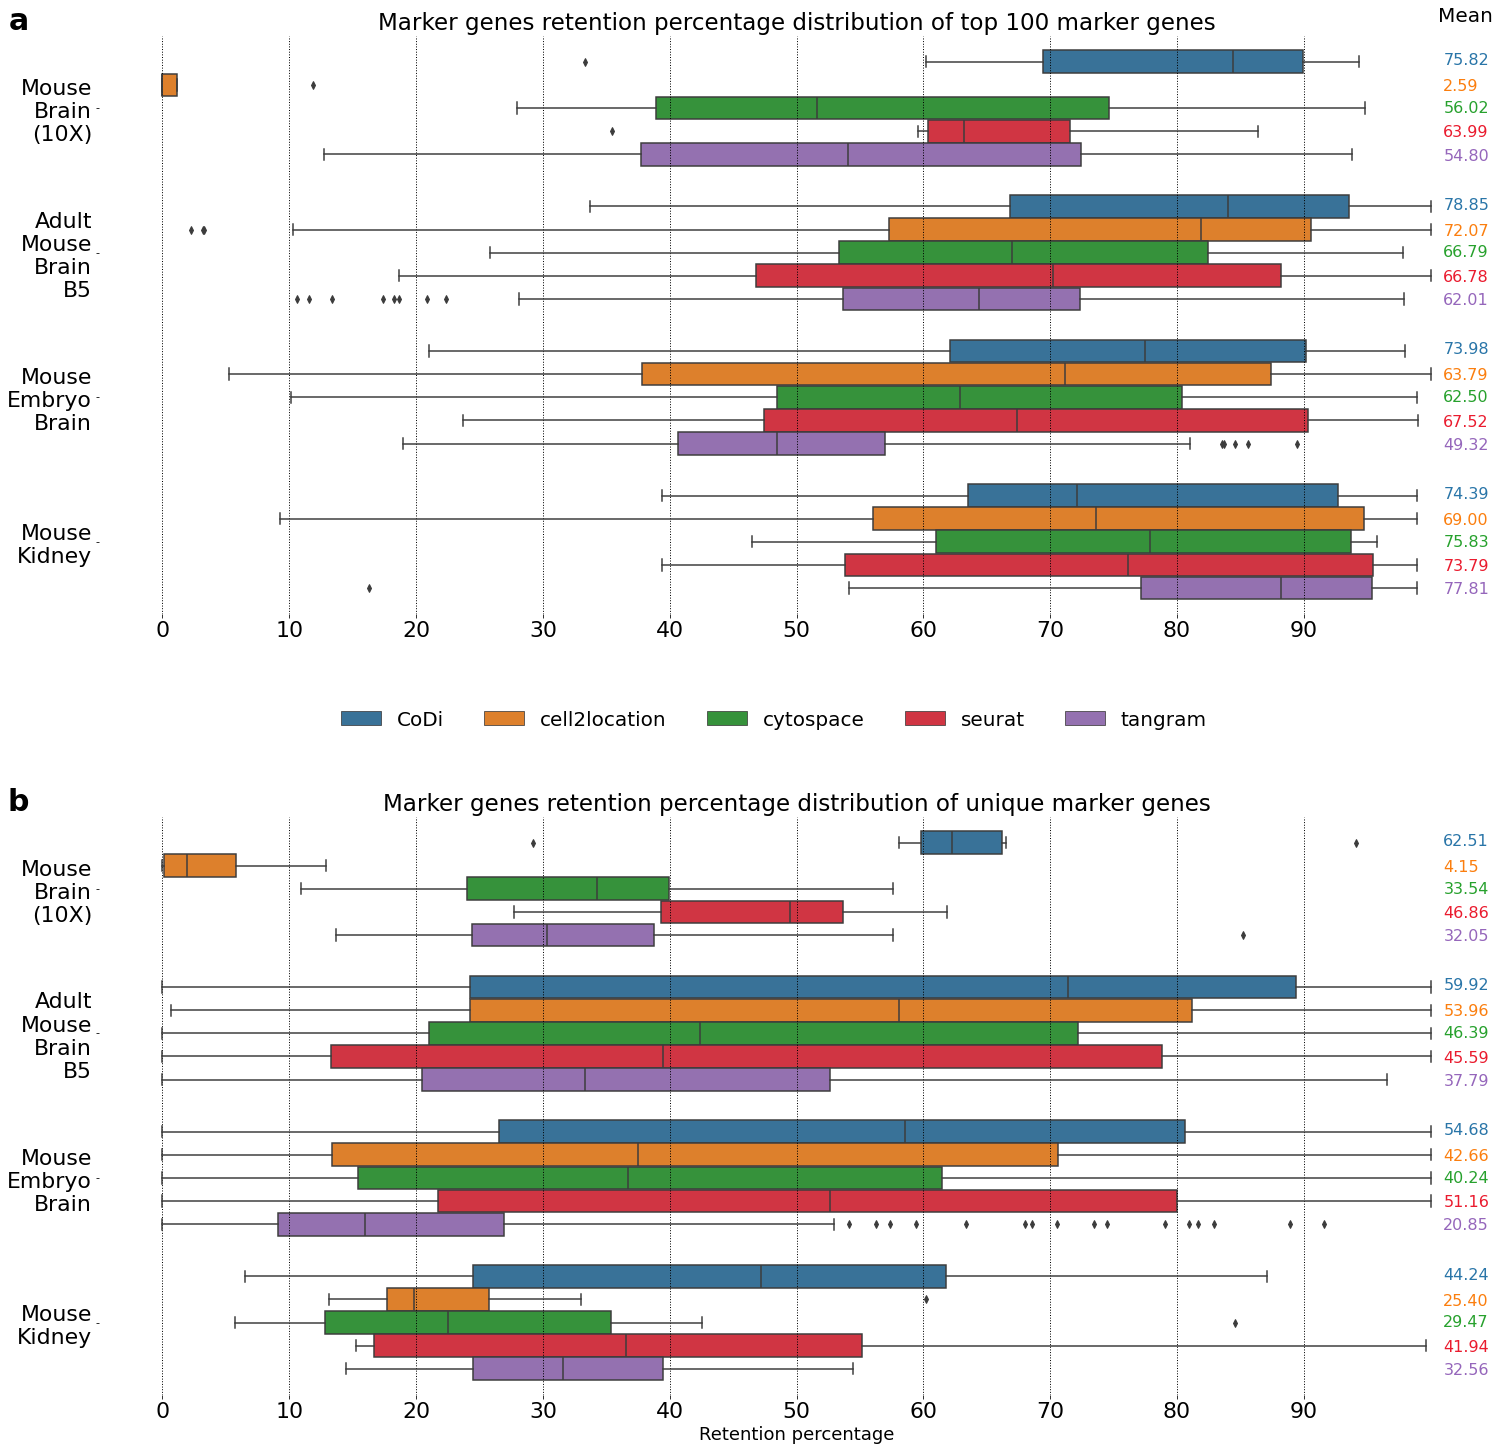

In [184]:
# Define the color palette for each algorithm
algo_palette = {
    'CoDi': '#2975A8',
    'cell2location': '#FB7E0E',
    'cytospace': '#27A12D',
    'seurat': '#EA1B2E',
    'tangram': '#9566BB'
}

# Ensure the order of the algorithms in the plot
algo_order = ['CoDi', 'cell2location', 'cytospace', 'seurat', 'tangram']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(25, 25))

for ind, rtype in enumerate(sorted(merged_df['Retention type'].unique())):
    subset_df = merged_df[(merged_df['Retention type'] == rtype)][['Cell type', 'Number of cells', 'Algo', 'Sample', 'Retention percentage']]
    boxpl = sns.boxplot(data=subset_df, y='Sample', x='Retention percentage', hue='Algo', orient='h', 
                        palette=algo_palette, hue_order=algo_order, ax=axs[ind])

    # Adjust legend to avoid duplicates
    handles, labels = axs[ind].get_legend_handles_labels()
    
    # Only show the legend for the first subplot
    if ind == 0:
        axs[ind].legend([], [], frameon=False)  # Temporarily remove legend from plot
    else:
        axs[ind].get_legend().remove()  # Hide legend from second plot

    # Update y-axis labels to capitalize and add line breaks
    sample_labels = subset_df['Sample'].unique()
    axs[ind].set_yticklabels([label.replace("_", " ").title().replace(" ", "\n") for label in sample_labels])

    # Annotate mean values at the exact y positions of each box
    y_tick_positions = {label: tick for label, tick in zip(sample_labels, axs[ind].get_yticks())}
    al_pos = {0: -0.33, 1: -0.15, 2: +0., 3: 0.17, 4: 0.33}

    for al_cnt, algo in enumerate(algo_order):
        for sample in sample_labels:
            sample_algo_df = subset_df[(subset_df['Algo'] == algo) & (subset_df['Sample'] == sample)]
            mean_value = sample_algo_df['Retention percentage'].mean()
            if not np.isnan(mean_value):
                y = y_tick_positions[sample]  # y position based on the sample's tick position
                axs[ind].text(101,  # x position (slightly right of the boxplot)
                              y + al_pos[al_cnt],  # exact y position from y-tick
                              f'{mean_value:.2f}',  # formatted mean value
                              color=algo_palette[algo],
                              ha='left', va='center', fontsize=16)

    axs[ind].grid(zorder=0, linewidth=1, linestyle=':', color='k')
    axs[ind].grid(False, axis='y')
    axs[ind].set_title(f'Marker genes retention percentage distribution of {rtype}', size=23)

    # Remove the box (spines) around each diagram
    for spine in axs[ind].spines.values():
        spine.set_visible(False)

    # Increase font size for y labels and ticks
    axs[ind].set_ylabel("", fontsize=18)
    axs[ind].tick_params(axis='y', labelsize=22)

    # Remove xlabel for the first diagram
    if ind == 0:
        axs[ind].set_xlabel("")
    else:
        axs[ind].set_xlabel("Retention percentage", fontsize=18)

    # Increase font size for x ticks
    axs[ind].tick_params(axis='x', labelsize=22)
    axs[ind].set_xticks(np.arange(0, 100, 10))

# Add "a" label to the top left of the first diagram and "b" to the top left of the second
axs[0].text(-0.05, 1.05, "a", transform=axs[0].transAxes, fontsize=30, fontweight="bold", va="top", ha="right")
axs[1].text(-0.05, 1.05, "b", transform=axs[1].transAxes, fontsize=30, fontweight="bold", va="top", ha="right")

# Add "Mean" label to the top right corner of the first diagram
axs[0].text(0.96, 1.05, "Mean", transform=axs[0].transAxes, fontsize=20, va="top", ha="left")

# Add a horizontal legend between the two diagrams, slightly lower
fig.legend(handles=handles[:len(set(labels))], labels=labels[:len(set(labels))], 
           loc='center', ncol=len(algo_order), fontsize=20, frameon=False, bbox_to_anchor=(0.5, 0.5))

# Increase space between the two subplots
fig.subplots_adjust(hspace=0.35)  # Increase this value if more space is needed
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit everything nicely
plt.savefig('fig3_retention_per_cell_type.pdf', dpi=300, bbox_inches='tight')

# Cumulative retention of marker genes (obsolete)

In [187]:
files = [f for f in glob("../data/reports_final/*.csv") if not f.endswith("_per_cell_type.csv")]
fproc = list(map(os.path.basename, files))
fproc = [('_'.join(f.split('_')[: -1]), f[:-4].split('_')[-1]) for f in fproc]
fproc

[('visium_mouse_brain_cytospace_per', 'ctype'),
 ('visium_mouse_brain_tangram_per', 'ctype'),
 ('whole_brain_mouse_embryo', 'seurat'),
 ('mouse_kidney', 'cytospace'),
 ('whole_brain_mouse_embryo', 'CoDi'),
 ('visium_mouse_brain', 'CoDi'),
 ('adult_mouse_brain_B5_cell2location_per', 'ctype'),
 ('adult_mouse_brain_B5_seurat_per', 'ctype'),
 ('whole_brain_mouse_embryo_seurat_per', 'ctype'),
 ('whole_brain_mouse_embryo', 'tangram'),
 ('mouse_kidney_seurat_per', 'ctype'),
 ('visium_mouse_brain', 'cell2location'),
 ('mouse_kidney', 'tangram'),
 ('whole_brain_mouse_embryo_cytospace_per', 'ctype'),
 ('whole_brain_mouse_embryo', 'cytospace'),
 ('adult_mouse_brain_B5', 'seurat'),
 ('adult_mouse_brain_B5', 'CoDi'),
 ('mouse_kidney', 'seurat'),
 ('mouse_kidney', 'CoDi'),
 ('visium_mouse_brain_seurat_per', 'ctype'),
 ('visium_mouse_brain', 'cytospace'),
 ('whole_brain_mouse_embryo', 'cell2location'),
 ('adult_mouse_brain_B5_tangram_per', 'ctype'),
 ('adult_mouse_brain_B5_CoDi_per', 'ctype'),
 ('mou

In [ ]:
scores_dict = {'top 100 marker genes': [['tangram', [0, 0, 0, 0]],
          ['cytospace', [0, 0, 0, 0]],
          ['seurat', [0, 0, 0, 0]],
          ['cell2location', [0, 0, 0, 0]],
          ['CoDi', [0, 0, 0, 0]]],
               'unique marker genes': [['tangram', [0, 0, 0, 0]],
          ['cytospace', [0, 0, 0, 0]],
          ['seurat', [0, 0, 0, 0]],
          ['cell2location', [0, 0, 0, 0]],
          ['CoDi', [0, 0, 0, 0]]]}
samples_dict = {'adult_mouse_brain_B5':0, 'whole_brain_mouse_embryo':1, 'visium_mouse_brain':2, 'mouse_kidney':3}
tools_dict = {'tangram': 0, 'cytospace': 1, 'seurat': 2, 'cell2location': 3, 'CoDi':4}

for path, tup in zip(files, fproc):
    df = pd.read_csv(path).set_index('retention type')
    for metric in ['top 100 marker genes', 'unique marker genes']:
        scores_dict[metric][tools_dict[tup[1]]][1][samples_dict[tup[0]]] = df.loc[metric, 'retention percentage']
scores_dict

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
# https://gallery.pyecharts.org/#/Bar/bar_markpoint_type
# ds = ['Adult mouse brain B5 (stereo-seq)', 'Whole brain mouse embryo (stereo-seq)', 'Mouse brain (10x Visium)', 'Mouse kidney (Slide-seq V2)']
ds = ['Adult mouse brain B5', 'Embryo mouse brain', 'Mouse brain (10x)', 'Mouse kidney']

metric_dict = {'top 100 marker genes': 'top 100', 'unique marker genes': 'non-ubiquitous'}
for metric, scores in scores_dict.items():
    bar = Bar().add_xaxis(ds)
    bar.set_global_opts(title_opts=opts.TitleOpts(title=f'Retention % of \n{metric_dict[metric]} scRNA genes'))
    for yAxis in scores:
        bar.add_yaxis(*yAxis)
        
    mark_point_datas = []
    for i in range(len(ds)):
        for j in range(len(scores)):
            print([i * len(scores) + j, scores[j][1][i]], scores[j][1][i])
            mark_point_datas.append(opts.MarkPointItem(name=f"", coord=[(i, j), scores[j][1][i]], value=scores[j][1][i], symbol_size=55))  # symbol='circle'
    # mark_point_datas = np.reshape(mark_point_datas, (len(ds), len(scores))).tolist()
    # bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False), markpoint_opts=opts.MarkPointOpts(data=mark_point_datas))
    bar.render(metric + ".html")


[0, 64.0] 64.0
[1, 67.7] 67.7
[2, 66.66] 66.66
[3, 73.71] 73.71
[4, 78.91] 78.91
[5, 50.25] 50.25
[6, 62.06] 62.06
[7, 67.31] 67.31
[8, 64.94] 64.94
[9, 74.14] 74.14
[10, 54.15] 54.15
[11, 54.74] 54.74
[12, 61.68] 61.68
[13, 9.74] 9.74
[14, 74.89] 74.89
[15, 71.73] 71.73
[16, 70.34] 70.34
[17, 74.19] 74.19
[18, 65.43] 65.43
[19, 72.86] 72.86
[0, 44.5] 44.5
[1, 47.48] 47.48
[2, 40.24] 40.24
[3, 45.29] 45.29
[4, 60.26] 60.26
[5, 27.54] 27.54
[6, 41.81] 41.81
[7, 49.39] 49.39
[8, 33.93] 33.93
[9, 54.3] 54.3
[10, 35.2] 35.2
[11, 35.21] 35.21
[12, 42.82] 42.82
[13, 8.83] 8.83
[14, 58.5] 58.5
[15, 30.85] 30.85
[16, 26.75] 26.75
[17, 49.84] 49.84
[18, 41.67] 41.67
[19, 48.26] 48.26


In [57]:
scores

[['tangram', [64.0, 50.25, 54.15, 71.73]],
 ['cytospace', [67.7, 62.06, 54.74, 70.34]],
 ['seurat', [66.66, 67.31, 61.68, 74.19]],
 ['cell2location', [73.71, 64.94, 9.74, 65.43]],
 ['CoDi', [78.91, 74.14, 74.89, 72.86]]]